In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
# from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:

train = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\Train.csv')
test = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\Test.csv')
ss = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\SampleSubmission.csv')
variables = pd.read_csv('C:\\Users\\Students\\Desktop\\financial-inclusion-in-africa\\VariableDefinitions.csv')

In [3]:
#lets observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [4]:
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [5]:
#inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# check for missing values
print('missing values:', train.isnull())

missing values:        country   year  uniqueid  bank_account  location_type  \
0        False  False     False         False          False   
1        False  False     False         False          False   
2        False  False     False         False          False   
3        False  False     False         False          False   
4        False  False     False         False          False   
...        ...    ...       ...           ...            ...   
23519    False  False     False         False          False   
23520    False  False     False         False          False   
23521    False  False     False         False          False   
23522    False  False     False         False          False   
23523    False  False     False         False          False   

       cellphone_access  household_size  age_of_respondent  \
0                 False           False              False   
1                 False           False              False   
2                 False      

In [7]:
print('missing values:', train.isnull())

missing values:        country   year  uniqueid  bank_account  location_type  \
0        False  False     False         False          False   
1        False  False     False         False          False   
2        False  False     False         False          False   
3        False  False     False         False          False   
4        False  False     False         False          False   
...        ...    ...       ...           ...            ...   
23519    False  False     False         False          False   
23520    False  False     False         False          False   
23521    False  False     False         False          False   
23522    False  False     False         False          False   
23523    False  False     False         False          False   

       cellphone_access  household_size  age_of_respondent  \
0                 False           False              False   
1                 False           False              False   
2                 False      

In [8]:
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [9]:
print('missing values:', train.isnull().sum().sum())

missing values: 0


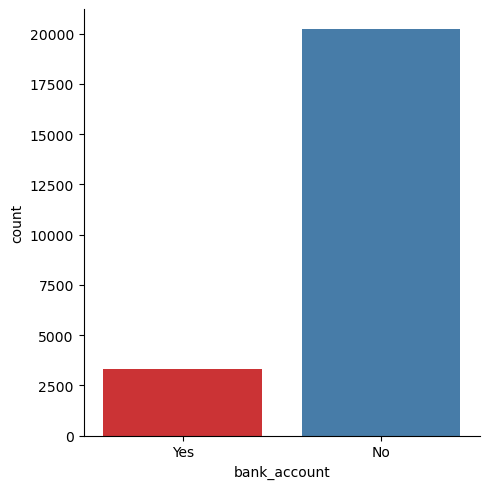

In [10]:
# explore tareget distribution
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")

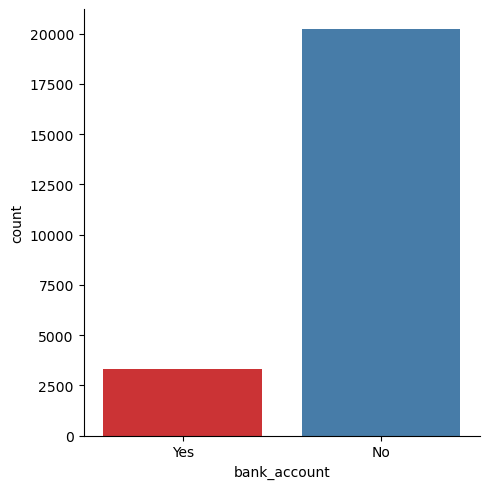

In [11]:
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")

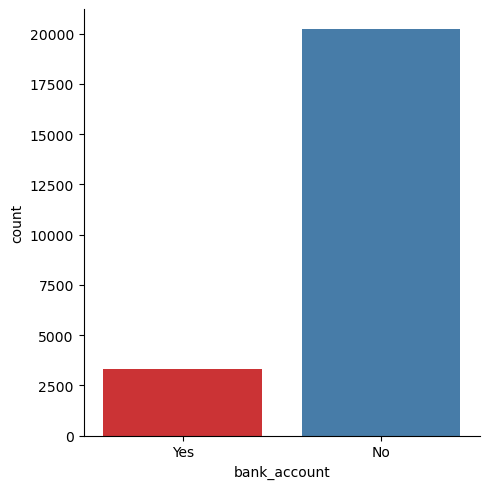

In [12]:
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")

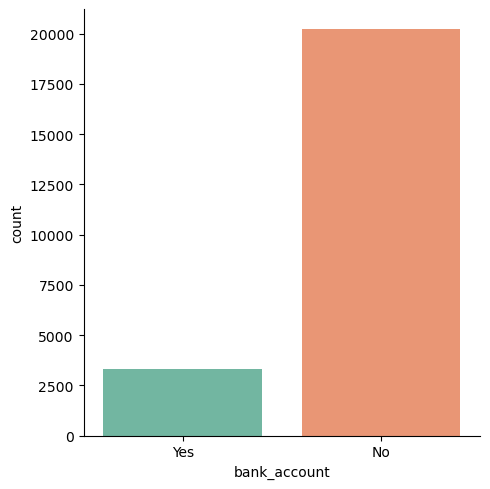

In [13]:
sns.catplot(x="bank_account", kind="count", data=train, palette="Set2")

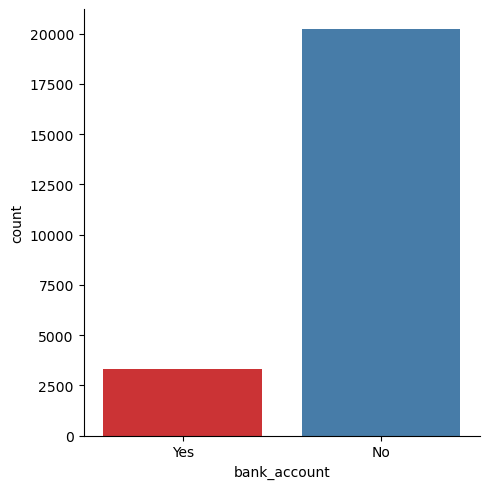

In [14]:
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")

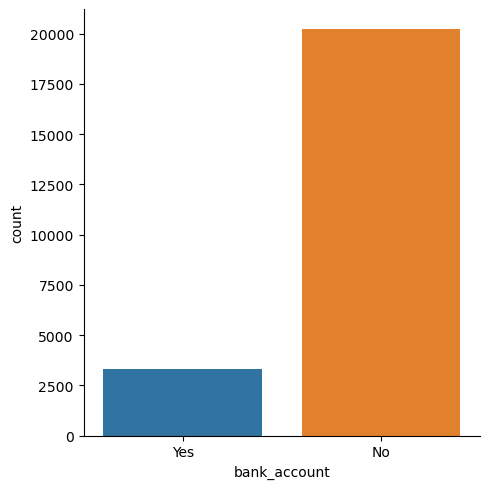

In [15]:
sns.catplot(x="bank_account", kind="count", data=train, )

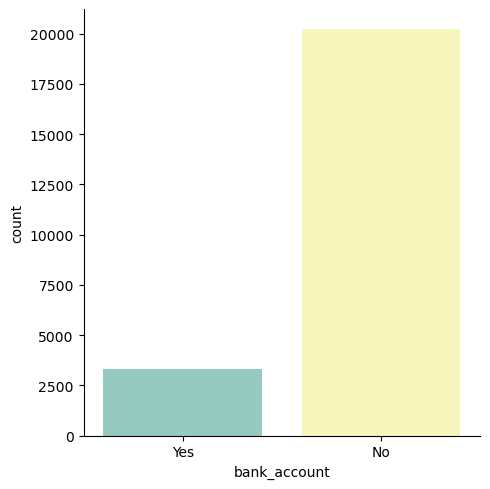

In [16]:
sns.catplot(x="bank_account", kind="count", data=train, palette="Set3")

In [17]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [18]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [19]:
ss.tail()

,unique_id,bank_account
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0
33609,uniqueid_3002 x Uganda,0


In [20]:
# show information about dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [21]:
# looking for variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [22]:
variables.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [23]:
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

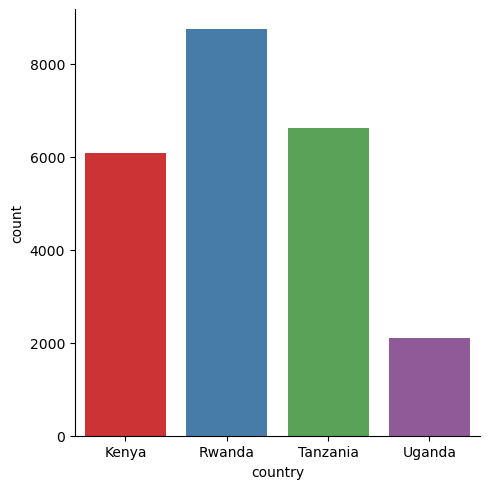

In [24]:
sns.catplot(x="country", kind="count", data=train, palette="Set1")

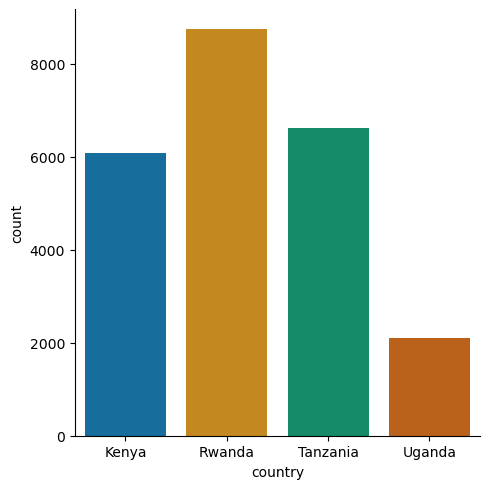

In [25]:
sns.catplot(x="country", kind="count", data=train, palette="colorblind")

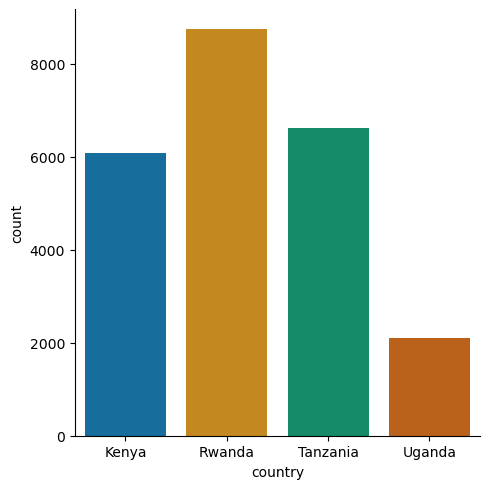

In [26]:
sns.catplot(x="country", kind="count", data=train, palette="colorblind")

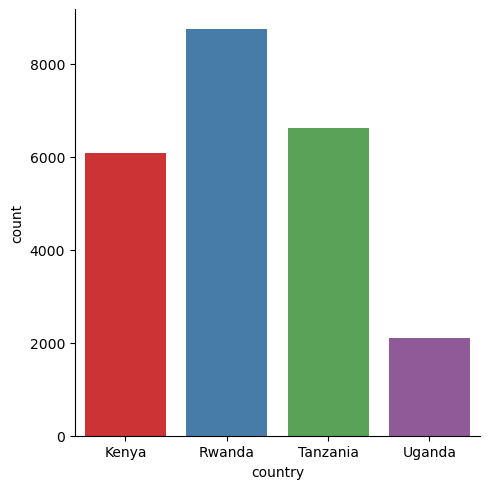

In [27]:
sns.catplot(x="country", kind="count", data=train, palette="Set1")

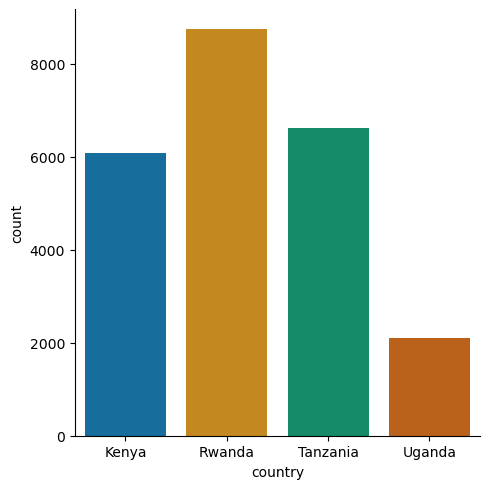

In [28]:
sns.catplot(x="country", kind="count", data=train, palette="colorblind")

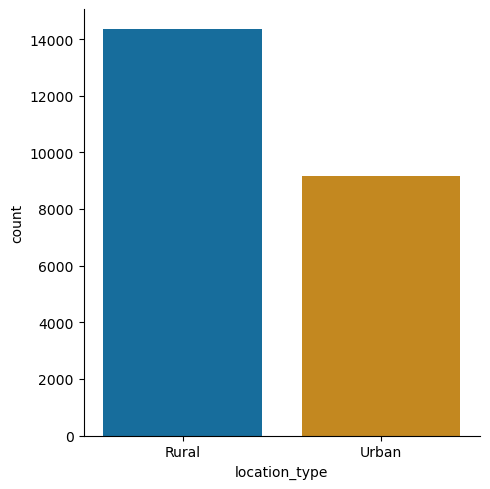

In [29]:
sns.catplot(x="location_type", kind="count", data=train, palette="colorblind")

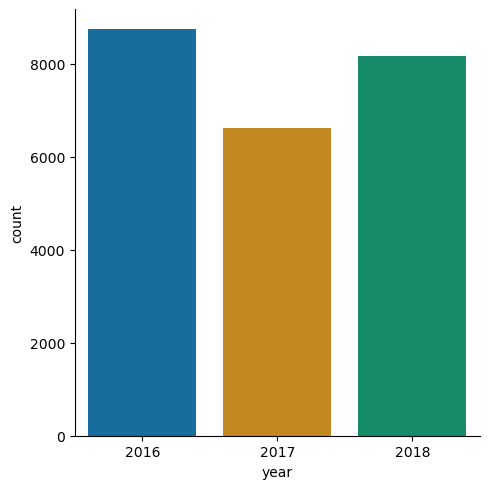

In [30]:
sns.catplot(x="year", kind="count", data=train, palette="colorblind")

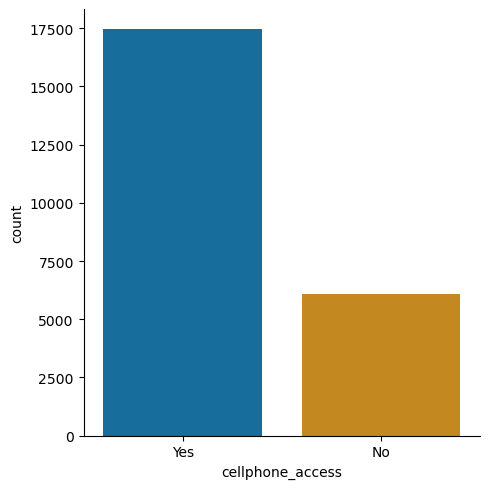

In [31]:
sns.catplot(x="cellphone_access", kind="count", data=train, palette="colorblind")

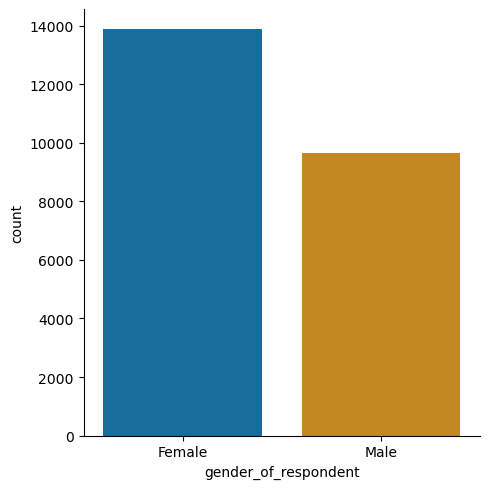

In [32]:
sns.catplot(x="gender_of_respondent", kind="count", data=train, palette="colorblind")

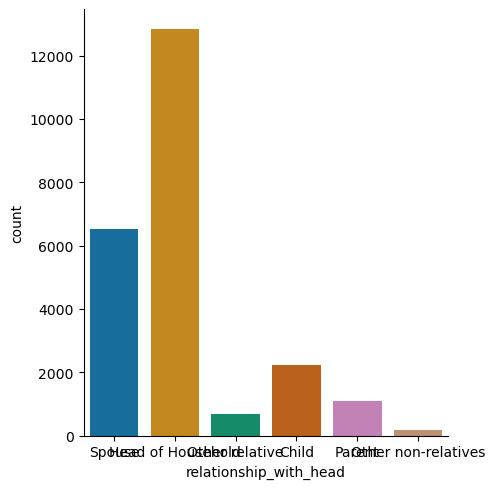

In [33]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

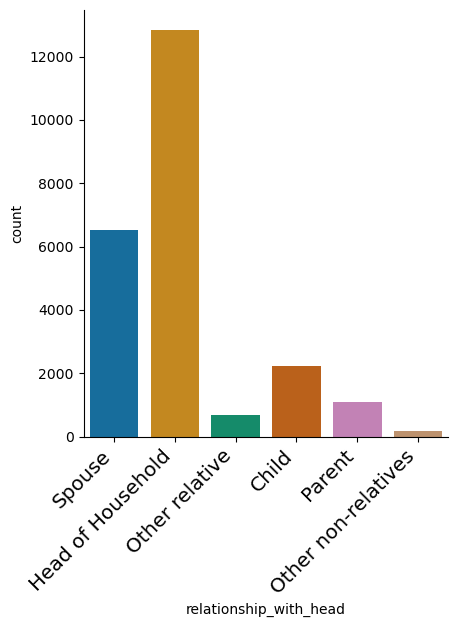

In [34]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

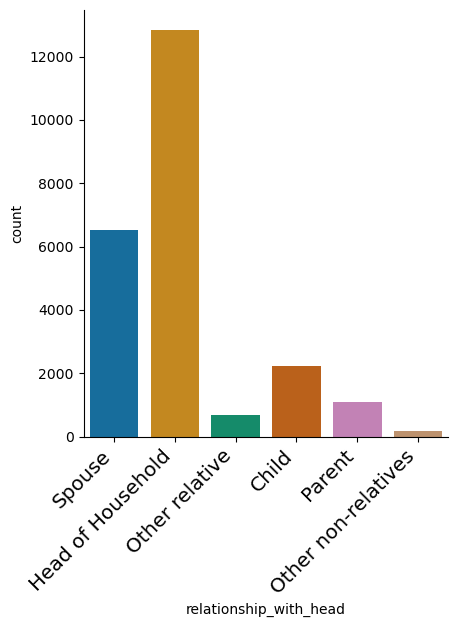

In [35]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind"),
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

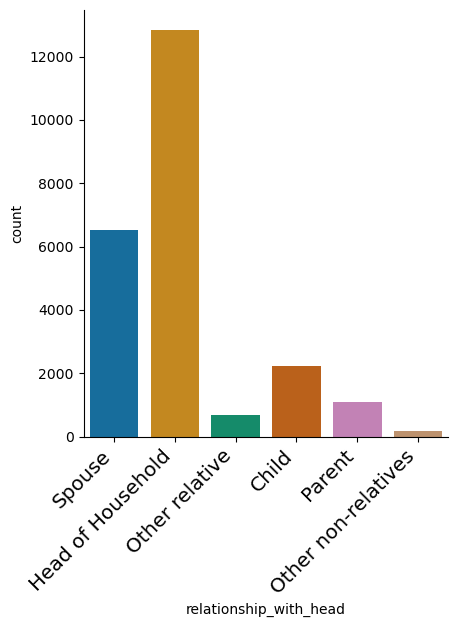

In [36]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

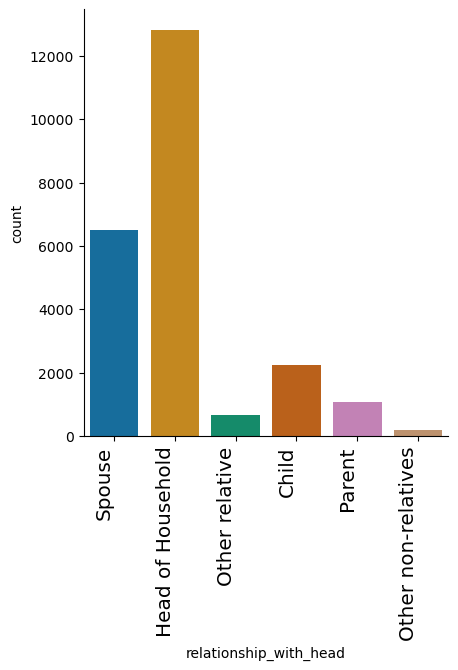

In [37]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=90,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

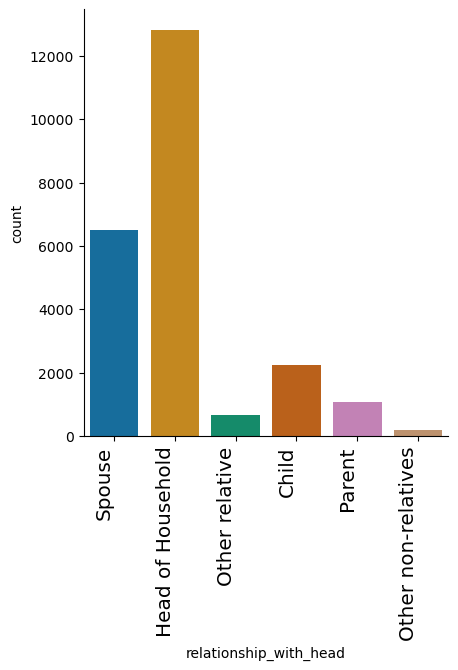

In [38]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=90,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

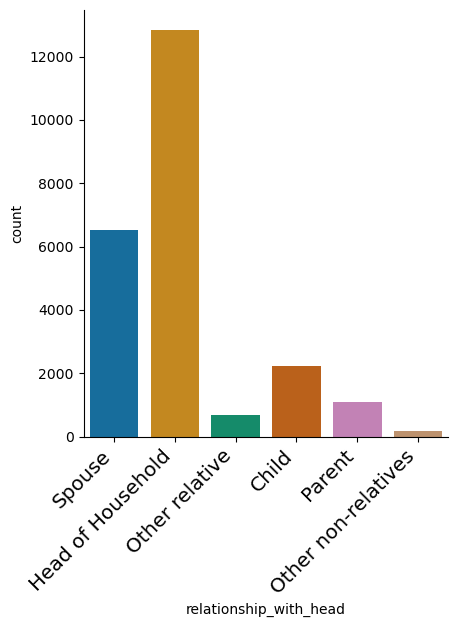

In [39]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

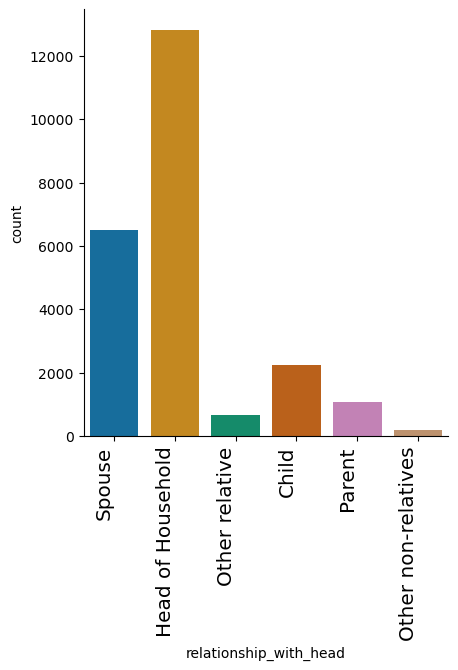

In [40]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=90,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

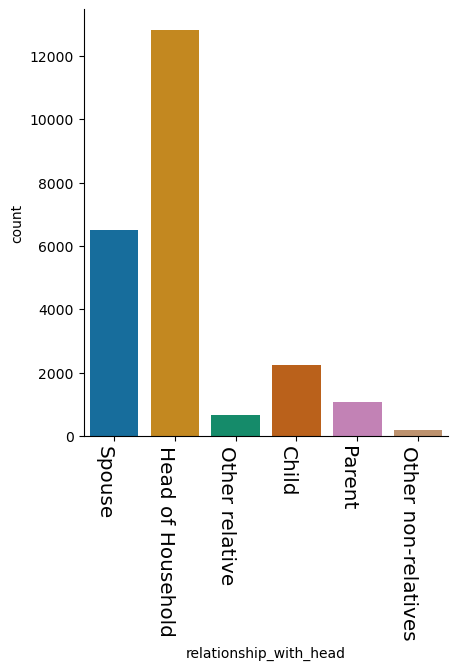

In [41]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=270,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

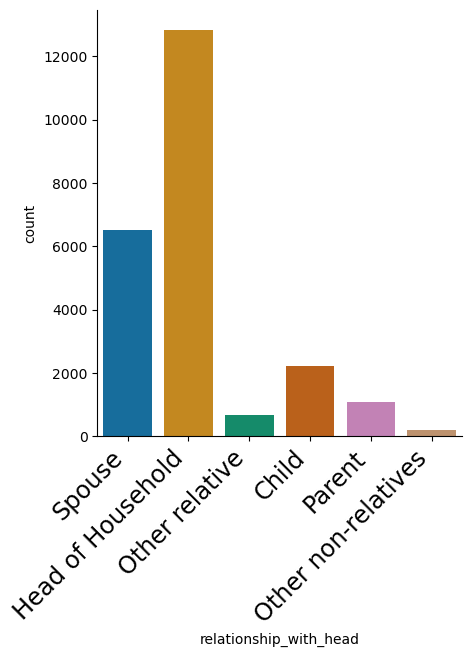

In [42]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='xx-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

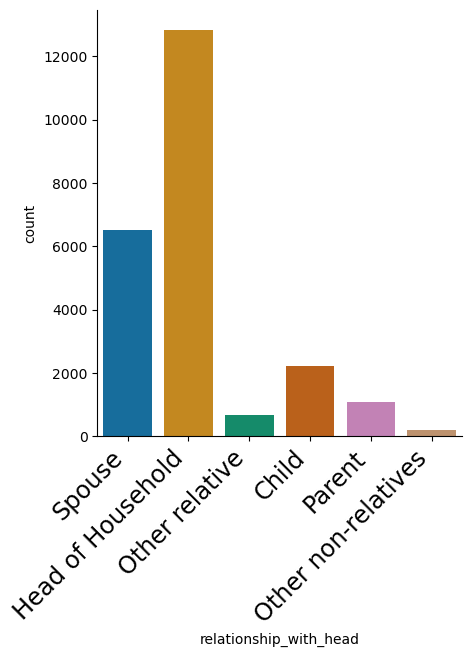

In [43]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='xx-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

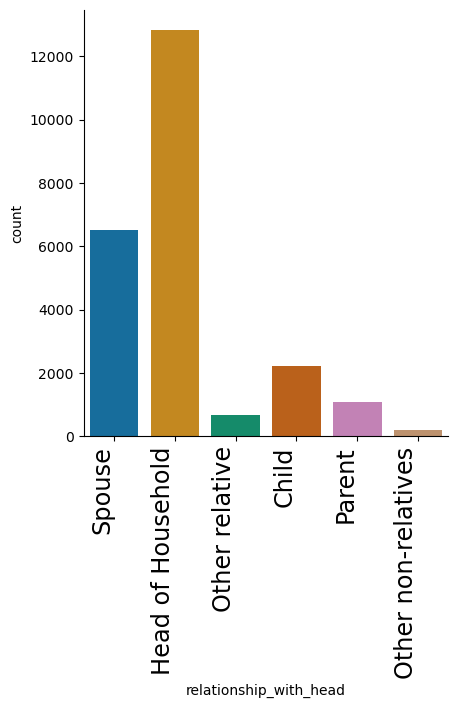

In [44]:
sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=90,
    horizontalalignment='right',
fontweight='light',
fontsize='xx-large'
)

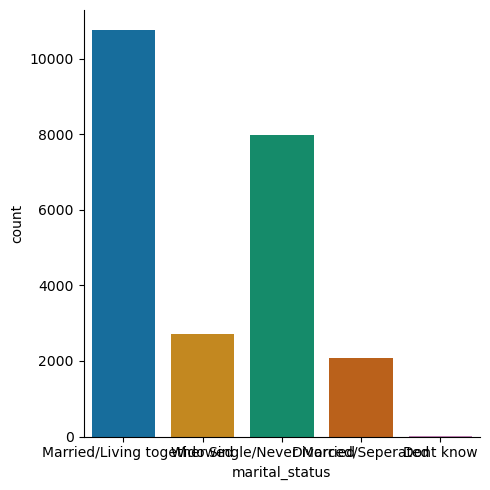

In [45]:
sns.catplot(x="marital_status", kind="count", data=train, palette="colorblind")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

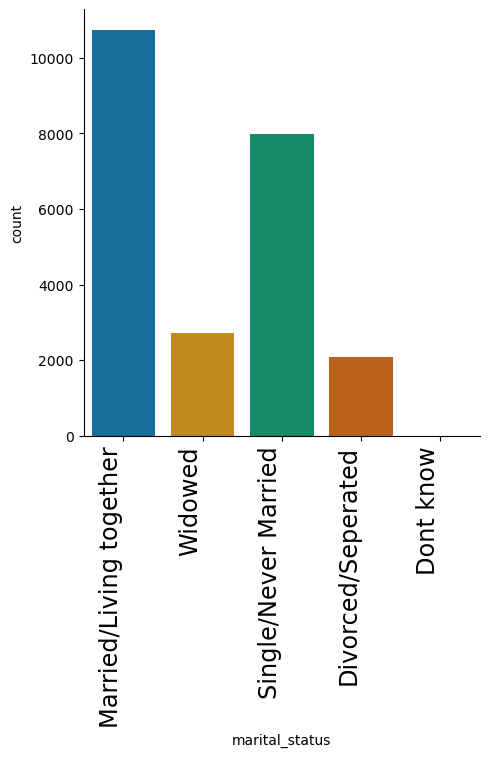

In [46]:
sns.catplot(x="marital_status", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=90,
    horizontalalignment='right',
fontweight='light',
fontsize='xx-large'
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

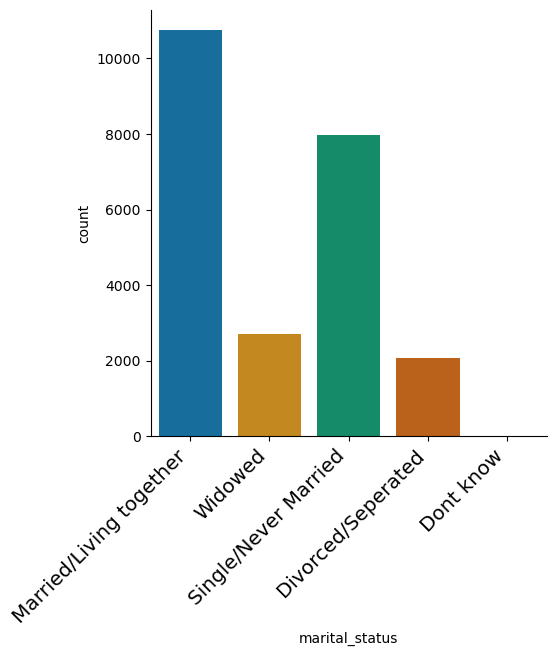

In [47]:
sns.catplot(x="marital_status", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

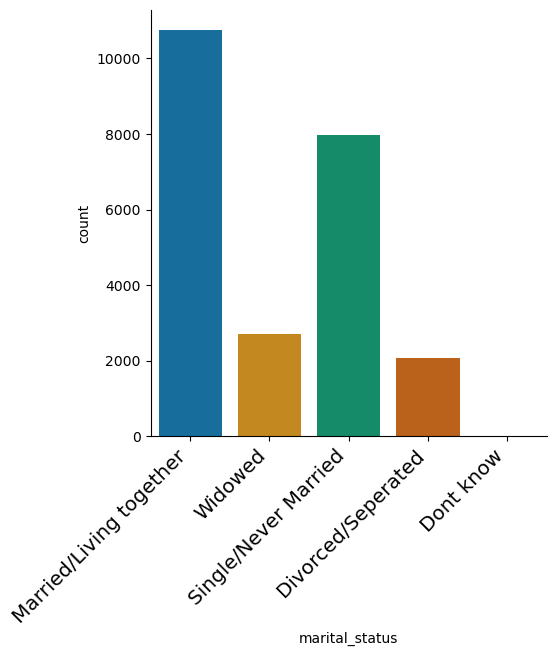

In [48]:
sns.catplot(x="marital_status", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

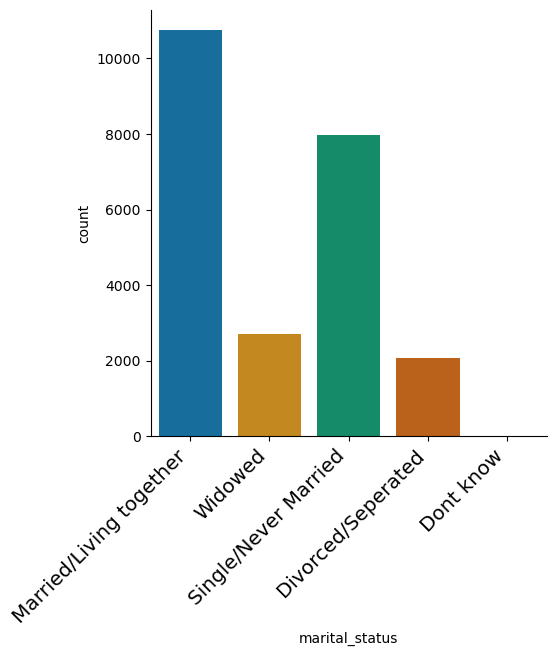

In [49]:
sns.catplot(x="marital_status", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

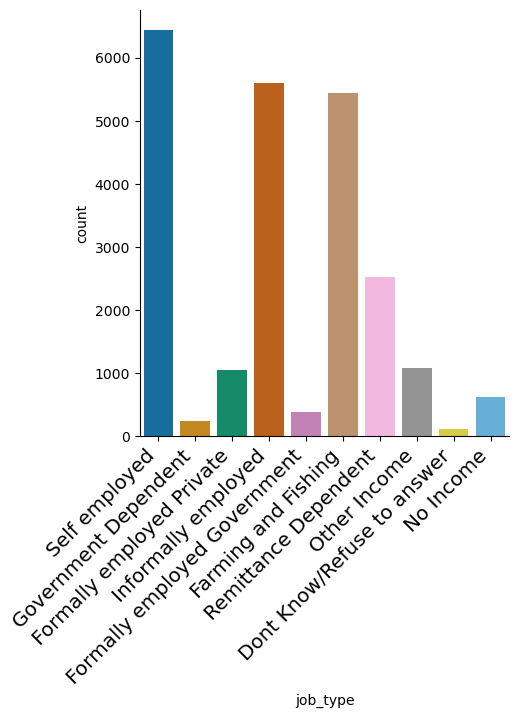

In [50]:
sns.catplot(x="job_type", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
fontweight='light',
fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

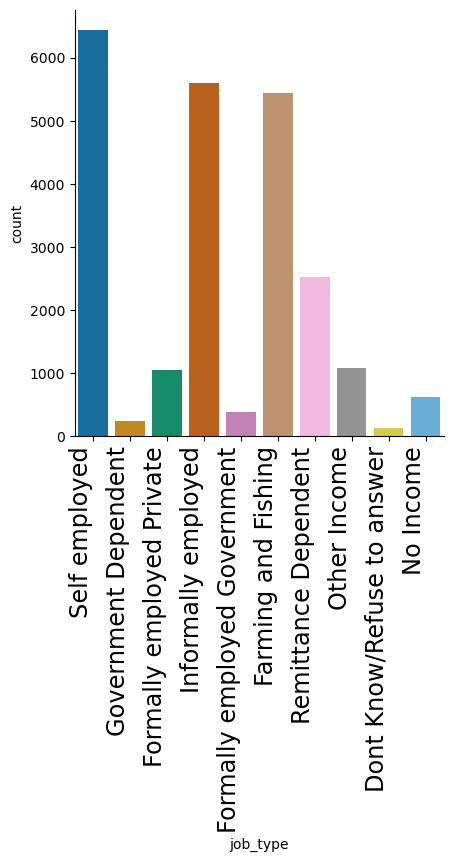

In [51]:
sns.catplot(x="job_type", kind="count", data=train, palette="colorblind")
plt.xticks(
    rotation=90,
    horizontalalignment='right',
fontweight='light',
fontsize='xx-large'
)

Text(0.5, 0, 'Household  size')

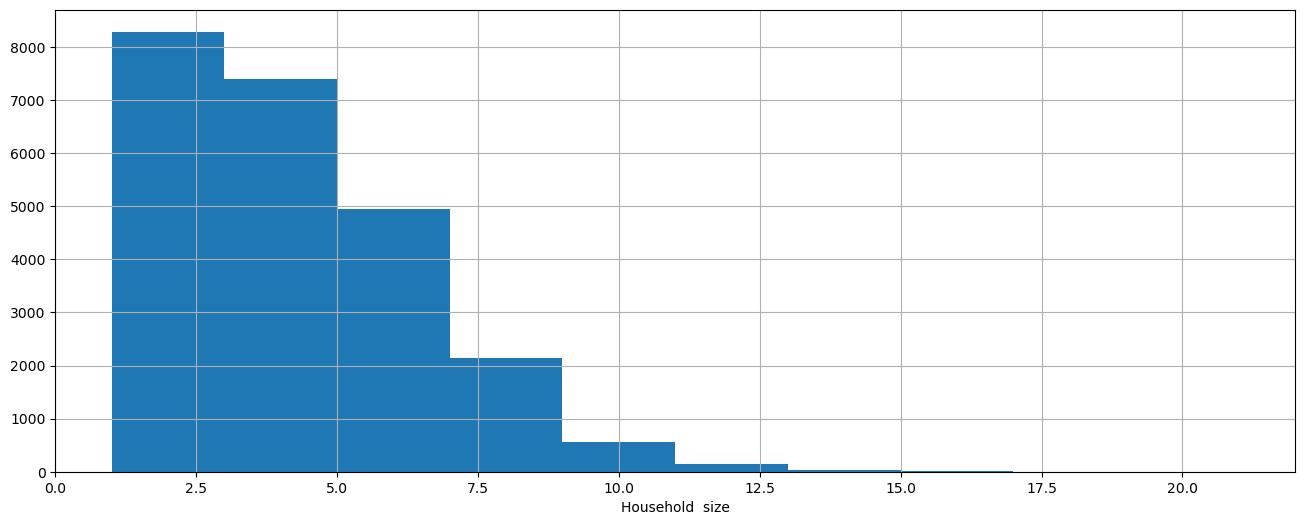

In [52]:
plt.figure(figsize=(16, 6))
train.household_size.hist()
plt.xlabel('Household  size')

In [53]:
print("unique household sizes:",)

unique household sizes:


(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

<Figure size 1600x1600 with 0 Axes>

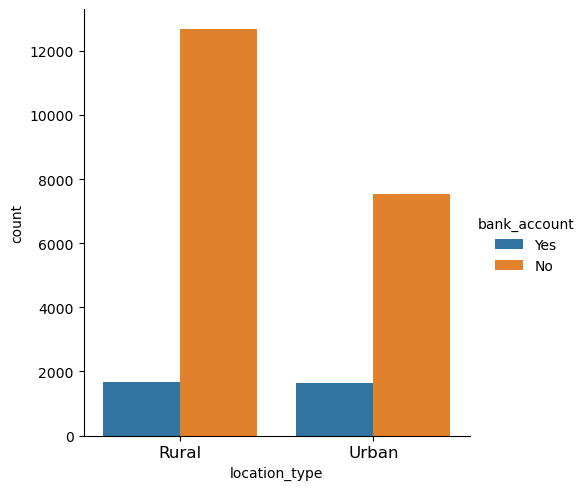

In [54]:
plt.figure(figsize=(16, 16))
sns.catplot(x='location_type', hue='bank_account',
kind='count', data=train)
plt.xticks(
fontweight='light',
fontsize='larger'
)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

<Figure size 1600x1600 with 0 Axes>

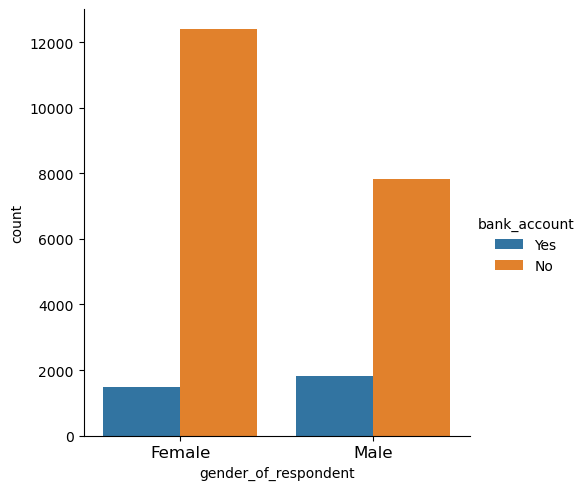

In [55]:
plt.figure(figsize=(16, 16))
sns.catplot(x='gender_of_respondent', hue='bank_account',
kind='count', data=train)
plt.xticks(
fontweight='light',
fontsize='larger'
)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x1600 with 0 Axes>

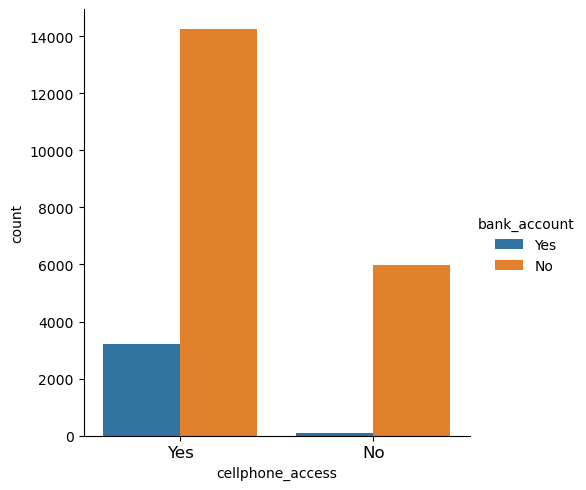

In [56]:
plt.figure(figsize=(16, 16))
sns.catplot(x='cellphone_access', hue='bank_account',
kind='count', data=train)
plt.xticks(
fontweight='light',
fontsize='larger'
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

<Figure size 1600x1600 with 0 Axes>

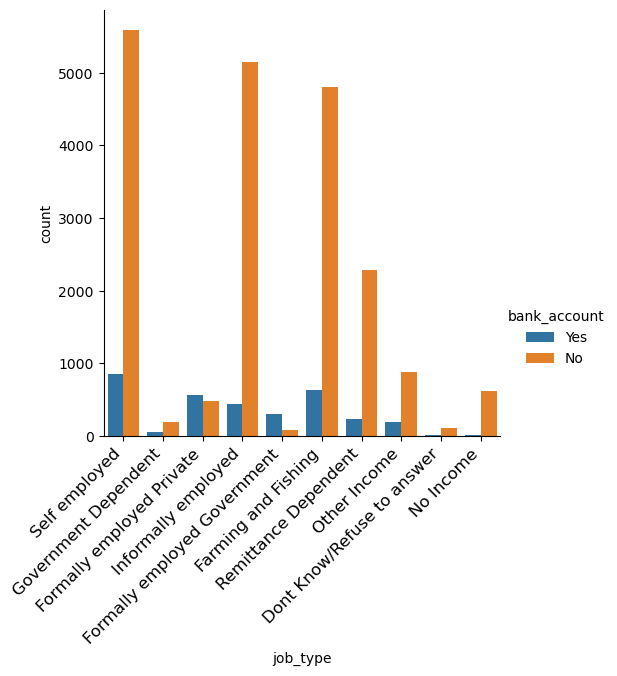

In [57]:
plt.figure(figsize=(16, 16))
sns.catplot(x='job_type', hue='bank_account',
kind='count', data=train)
plt.xticks(
fontweight='light',
     rotation=45,
    horizontalalignment='right',
fontsize='larger'
)

In [58]:
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import MinMaxScaler

In [59]:
    le = LabelEncoder()
    train['bank_account'] = le.fit_transform(train['bank_account'])

In [60]:
    X_train = train.drop(['bank_account'], axis=1)

In [61]:
    x_train = train.drop(['bank_account'], axis=1)
    y_train = train['bank_account']
    print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [62]:
def preprocessing_data(data):
    
    float_array = data[["household_size","age_of_respondent","year"]].values.astype(float)
    categ = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    data = data.drop(["uniqueid"], axis=1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    return data

In [63]:
processed_train = preprocessing_data(x_train)
processed_test = preprocessing_data(test)
import sklearn.model_selection
import sklearn.model_selection
from sklearn.model_selection import train_test_split
x_Train, x_val, y_Train, y_val, = train_test_split(
processed_train, y_train, stratify = y_train, test_size = 28, random_state=42)

In [64]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(x_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
xg_y_model = xg_model.predict(x_val)
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.0714285714285714


In [71]:
from sklearn.metrics import classification_report
report = classification_report(y_val, xg_y_model)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28



In [72]:
xg_y_model = xg_model.predict(x_val)
acc_score = accuracy_score(y_val, xg_y_model)
print('Accuracy is = ', acc_score)
print("Error rate of XGB classifier: ", 1 - acc_score)

Accuracy is =  0.9285714285714286
Error rate of XGB classifier:  0.0714285714285714


Error rate for XGBClassifier model is:  0.0714285714285714
confusion matrix:
[[1.  0. ]
 [0.5 0.5]]


<function matplotlib.pyplot.show(close=None, block=None)>

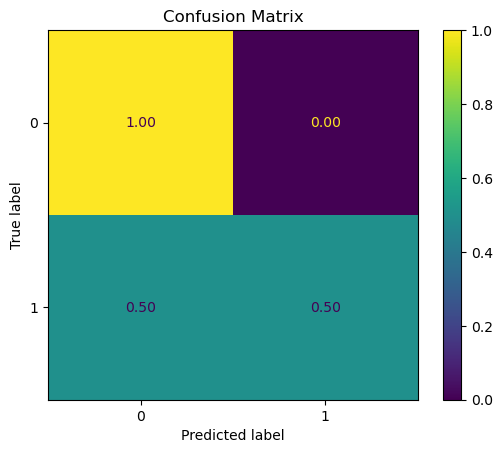

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
xgboost_model_predicted = xg_model.predict(x_val)
score = accuracy_score(y_val, xgboost_model_predicted)
print("Error rate for XGBClassifier model is: ", 1- score)
cm = confusion_matrix(y_val, xgboost_model_predicted, normalize='true')
print("confusion matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap='viridis', values_format='.2f')
plt.title("Confusion Matrix")
plt.show

In [77]:
test.bank_account = xg_model.predict(processed_test)

In [78]:
submission = pd.DataFrame({
    "uniqueid": test["uniqueid"] + " x " + test["country"],
    "bank_account": test.bank_account
})

In [79]:
submission.sample(15)

,uniqueid,bank_account
8035,uniqueid_8310 x Tanzania,0
208,uniqueid_6277 x Kenya,0
2106,uniqueid_8175 x Kenya,0
5244,uniqueid_11379 x Rwanda,0
940,uniqueid_7009 x Kenya,1
7043,uniqueid_7318 x Tanzania,0
4451,uniqueid_10586 x Rwanda,0
3065,uniqueid_9200 x Rwanda,0
4849,uniqueid_10984 x Rwanda,0
1283,uniqueid_7352 x Kenya,0


In [90]:
from IPython.display import FileLink
submission.to_csv('EDMOND1.csv', index= False)

In [91]:
FileLink('EDMOND1.csv')

C:\Users\Students\Desktop\financial-inclusion-in-africa\EDMOND1.csv

In [95]:
from IPython.display import FileLink
submission.to_excel('EDMOND2.xlsx', index= False)

In [93]:
FileLink('EDMOND2.xlsx')

C:\Users\Students\Desktop\financial-inclusion-in-africa\EDMOND2.xlsx